In [3]:
from numpy import size
import gc
import random as random
%env XLA_FLAGS=--xla_gpu_cuda_data_dir=/usr/lib/cuda
import tensorflow as tf
from scripts import commonUtils as alex

# Allow memory growth for the GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
seed=random.randint(1,99999)
size=(100,100)
dataPath='images100'
pool=alex.getSamples(dataPath,size,batchSize=99999,seed=seed,split=0.2)
tf.keras.backend.clear_session()
poolValidation=alex.getSamples(dataPath,batchSize=9999,imgSize=size,seed=seed,training=False,split=0.2)

poolValidation.restPool()
valPool=poolValidation.getBatch(reshae=False)
batch=pool.getBatch(reshae=False)


env: XLA_FLAGS=--xla_gpu_cuda_data_dir=/usr/lib/cuda


2025-01-27 16:10:53.344974: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-27 16:10:53.369893: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-27 16:10:53.369920: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-27 16:10:53.369924: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-27 16:10:53.374258: I tensorflow/core/platform/cpu_feature_g

Found 8108 files belonging to 1 classes.
Using 6487 files for training.


2025-01-27 16:10:54.810564: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-27 16:10:54.830189: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-01-27 16:10:54.830322: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Found 8108 files belonging to 1 classes.
Using 1621 files for validation.
1621   1621
got another batch,  0  remaning  we are using  1621
6487   6487
got another batch,  0  remaning  we are using  6487


In [4]:
import datetime

from modelli import modelli as modelli
autoencoder = modelli.AutoencoderRGB()



if False:
  autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss=modelli.costum_loss,
                       metrics=['mse',modelli.ssim_loss,modelli.costum_loss])
  #log_dir = "logs/fit/autoencoder" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  #tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, write_graph=True,histogram_freq=1)
  autoencoder.fit(batch, batch, # Note!
                  epochs=150,
                  shuffle=True,
                  batch_size=256,
                  validation_data=(valPool, valPool),
               callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=9)])
  #del batch

else:
   autoencoder=tf.keras.models.load_model("modelli/RGB-50-NO-RETRAIN",{"ssim_loss":modelli.ssim_loss,"costum_loss":modelli.costum_loss})
          

autoencoder.summary(expand_nested=True)
gc.collect()
tf.keras.backend.clear_session()

Model: "autoencoder_rgb"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 50, 50, 3)         4813      
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| input_1 (InputLayer)       [(None, 100, 100, 3)]     0        |
|                                                               |
| conv2d (Conv2D)            (None, 100, 100, 15)      1140     |
|                                                               |
| conv2d_1 (Conv2D)          (None, 50, 50, 15)        2040     |
|                                                               |
| conv2d_2 (Conv2D)          (None, 50, 50, 10)        1360     |
|                                                               |
| conv2d_3 (Conv2D)          (None, 50, 50, 3)         273      |
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
 model_1 (Functional)        (None, 100, 100, 3)   

In [5]:
if False :
    autoencoder.save('modelli/RGB-50-NO-RETRAIN')

In [6]:

if False:
   log_dir = "logs/fit/autoencoderRGBRevamp" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
   tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, write_graph=True,histogram_freq=1)
   autoencoderRevamp=modelli.AutoencoderFinalRGB(autoencoder)
   #tf.keras.utils.plot_model(autoencoderRevamp.decoder, "multi_input_and_output_model.png", expand_nested=True,show_shapes=True)
   opt=tf.keras.optimizers.Adam(learning_rate=0.001)
   autoencoderRevamp.compile(optimizer=opt, loss=modelli.costum_loss, metrics=['mse',modelli.ssim_loss,modelli.costum_loss])
   autoencoderRevamp.fit(batch, batch, # Note!
                     epochs=10,
                     shuffle=True,
                     batch_size=128,
                     validation_data=(valPool, valPool),
                  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=15),tensorboard_callback])
else:
   autoencoderRevamp=modelli.AutoencoderFinalRGB(modelli.AutoencoderRGB())
   autoencoderRevamp(batch[:5])
   autoencoderRevamp.load_weights('modelli/RGB-25-RETRAIN.h5')

2025-01-27 16:10:57.879579: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8902


In [7]:
if  False :
    autoencoderRevamp.save_weights('modelli/RGB-25-RETRAIN.h5')


In [8]:
import  numpy as np
autoencoder=autoencoderRevamp
n=5
startI=0

testPool=alex.getSamples("testSet",imgSize=(100,100),batchSize=99999,seed=1,split=0.0)

batch=testPool.getBatch(reshae=False)
a = autoencoder.encoder(batch[0:100])

decoded_imgs = autoencoder.decoder(autoencoder.converter([a])).numpy()
import matplotlib.pyplot as plt
print(batch[0].nbytes)

def getStats(encoded,normal):
    shape=(100,100)
    media=0
    result=0
    for i in range(0,len(encoded)):
            dec= encoded[i]
            nor= normal[i]
            for j in range(0,3):
                 media+=0.333*tf.image.ssim(tf.constant(np.reshape(dec[:,:,j],(100,100,1)), dtype='float32'), tf.constant(np.reshape(nor[:,:,j],(100,100,1)), dtype='float32'), max_val=1.0).numpy()
    ssimMedia=round(media/len(encoded),3)
    return [ssimMedia]

print(getStats(decoded_imgs,batch))

Found 86 files belonging to 1 classes.
86   86
got another batch,  0  remaning  we are using  86
240000
[0.905]


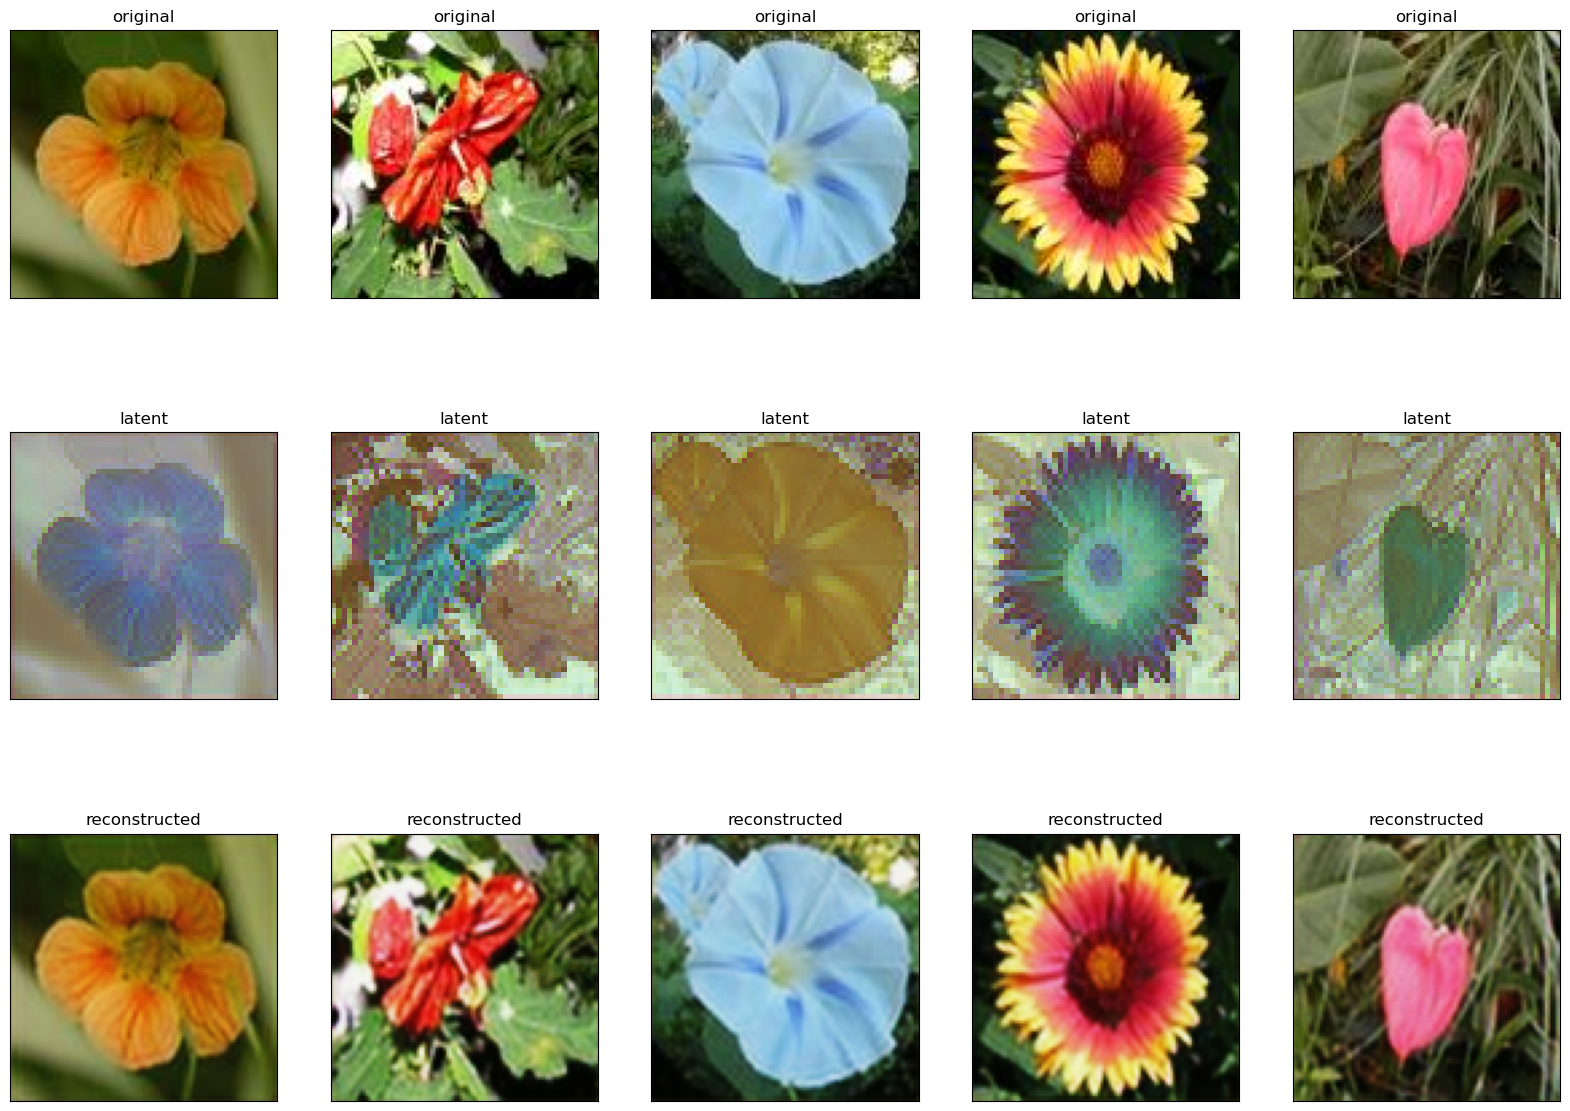

In [11]:
plt.figure(figsize=(20, 20))
startI=0
n=5
for i in range(startI,n):
  # display original
  ax = plt.subplot(4, 5, i-startI + 1)
  plt.imshow(batch[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(4, 5, i-startI + 1 +5)
  plt.imshow(a[i], vmin=0, vmax=255)
  plt.title("latent")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  

  # display reconstruction
  ax = plt.subplot(4, 5,i-startI + 1 + 2*5)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()
startI=n
n+=5

In [10]:
gc.collect()
tf.keras.backend.clear_session()